In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from time import time as t
from security_simulation import *
from RL_method.RL_actor_critic import *

import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

"""parameters"""
num_episode = 500
num_pc = 7
port_size = num_pc*2

In [2]:
def main(episodes):
    num_state = 4
    num_action = 4
    model = ActorCritic(num_state, num_action).to(device)
    print_interval = 20
    score = 0.0
    scoreList = []
    success_rate_list = []
    try_list = []
    suc_act = success_action()
    _try = 0
    _success = 0
    lr_list = []
    
    for n_epi in range(1, episodes+1):
        done = False
        seed = int(str(t0)[11:14])
        env = security(num_pc=num_pc, seed=seed, port_size=port_size)
        s = env.reset()
        
        while not done:
            for t in range(n_rollout):
                prob = model.pi(torch.from_numpy(s).float().to(device))
                m = Categorical(prob)
                a = m.sample().item()
                s_prime, r, done, info = env.step(a)
                model.put_data((s,a,r,s_prime,done))

                s = s_prime
                score += r
                if info[2]:
                    _try += 1
                    _success += 1
                else:
                    _try += 1
                
                if done:
                    break
                    
            suc_act.put(select_action(a))
            lr = model.train_net()
            lr_list.append(lr)
            
        if n_epi % print_interval == 0 and n_epi != 0:
            scoreList.append(score/print_interval)
            success_rate_list.append(round(_success/_try, 2))
            try_list.append(_try)
            print("\repisode : {}, avg score : {:.1f}".format(n_epi, score/print_interval))
            score = 0.0
            _try = 0
            _success = 0
            suc_act.reset()
        
        if n_epi != print_interval and n_epi != episodes:
            print(f"\r{n_epi % print_interval} / {print_interval}", end="")
            
    return scoreList, success_rate_list, try_list, suc_act.load_list(), lr_list

In [3]:
scoreList, success_rate_list, try_list, action_re, lr_list = main(num_episode)

episode : 20, avg score : -79.5
episode : 40, avg score : -23.8
episode : 60, avg score : -11.9
episode : 80, avg score : -9.9
episode : 100, avg score : -5.5
episode : 120, avg score : -3.7
episode : 140, avg score : -4.5
episode : 160, avg score : -4.5
episode : 180, avg score : -3.3
episode : 200, avg score : -2.8
episode : 220, avg score : -4.0
episode : 240, avg score : -4.5
episode : 260, avg score : -3.1
episode : 280, avg score : -3.0
episode : 300, avg score : -4.8
episode : 320, avg score : -3.9
episode : 340, avg score : -3.1
episode : 360, avg score : -3.8
episode : 380, avg score : -3.4
episode : 400, avg score : -3.0
episode : 420, avg score : -4.3
episode : 440, avg score : -3.6
episode : 460, avg score : -3.8
episode : 480, avg score : -4.1
episode : 500, avg score : -3.6


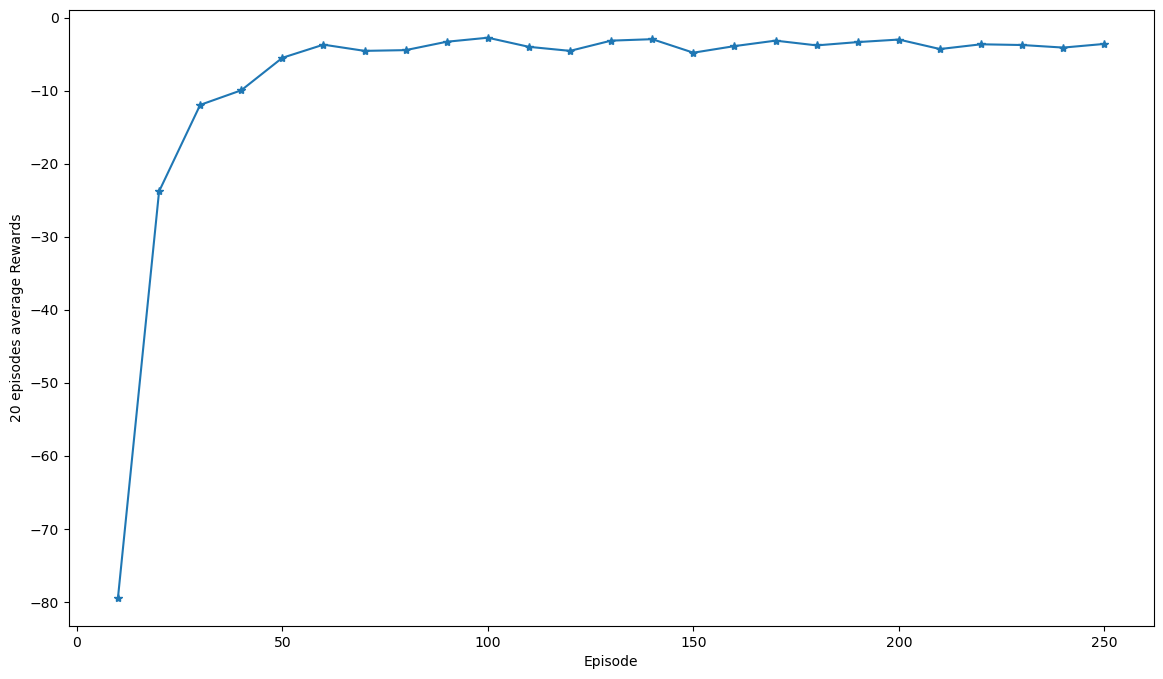

In [4]:
#performance visualization
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1, len(scoreList)+1) * 10, scoreList, '*-')
plt.xlabel('Episode')
plt.ylabel('20 episodes average Rewards')
plt.ylim = (-num_pc*1.2, num_pc*1.2)
plt.show()

In [5]:
with open("result_graphs/ActorCritic_lr.p", "wb") as f:
    pickle.dump(lr_list, f)

[55.650000000000006, 11.850000000000001, 2.0, 4.449999999999999, 1.7999999999999998, 0.8499999999999996, 0.09999999999999964, 1.1500000000000004, 0.5499999999999998, 1.25, 0.5499999999999998, 1.4, 0.19999999999999973, 1.8499999999999996, 0.8999999999999999, 0.75, 0.6499999999999999, 0.44999999999999973, 0.3500000000000001, 1.2999999999999998, 0.6499999999999999, 0.10000000000000009, 0.34999999999999964, 0.49999999999999956]


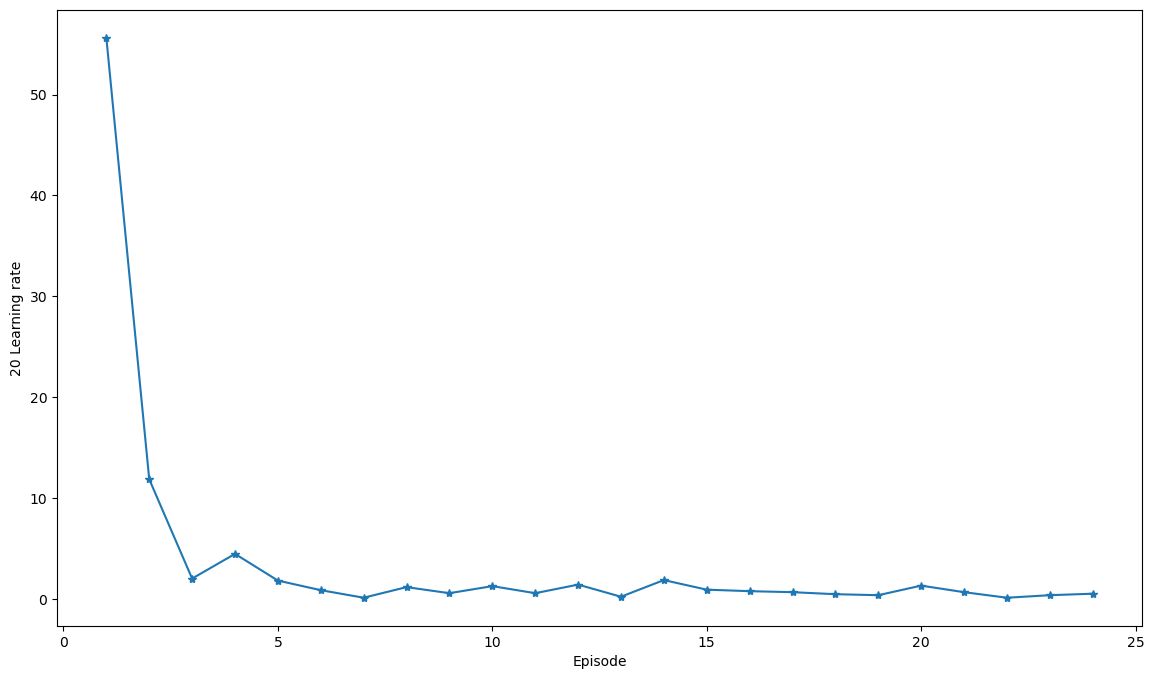

In [14]:
def calculate_differences(lst):
    return [abs(lst[i] - lst[i-1]) for i in range(1, len(lst))]

scoreList_diff = calculate_differences(scoreList)
print(scoreList_diff)
plt.figure(figsize=(14, 8))
plt.plot(np.arange(1, len(scoreList_diff)+1), scoreList_diff, '*-')
plt.xlabel('Episode')
plt.ylabel('20 Learning rate')
plt.ylim = (-num_pc*1.2, num_pc*1.2)
plt.show()

In [6]:
"""
with open("result_graphs/ActorCritic_avgReward.p", "wb") as f:
    pickle.dump(scoreList, f)
    
with open("result_graphs/ActorCritic_success.p", "wb") as f:
    pickle.dump(success_rate_list, f)
    
with open("result_graphs/ActorCritic_iteration.p", "wb") as f:
    pickle.dump(try_list, f)
    
with open("result_graphs/ActorCritic_action_re.p", "wb") as f:
    pickle.dump(action_re, f)
"""

'\nwith open("result_graphs/ActorCritic_avgReward.p", "wb") as f:\n    pickle.dump(scoreList, f)\n    \nwith open("result_graphs/ActorCritic_success.p", "wb") as f:\n    pickle.dump(success_rate_list, f)\n    \nwith open("result_graphs/ActorCritic_iteration.p", "wb") as f:\n    pickle.dump(try_list, f)\n    \nwith open("result_graphs/ActorCritic_action_re.p", "wb") as f:\n    pickle.dump(action_re, f)\n'